In [5]:
import yfinance as yf
import pandas as pd 
import numpy as np
import datetime as dt
import mplfinance as mpf
df = yf.download(tickers = "EURUSD=X",period = "1y",interval = "1h",group_by = 'ticker',
                 auto_adjust = True,prepost = True,threads = True,proxy = None)
df = pd.DataFrame(df)
#df = df.drop(df.index[-1])
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
2023-08-07 09:00:00+01:00,1.099264,1.099264,1.097695,1.097815,0
2023-08-07 10:00:00+01:00,1.097936,1.097936,1.096972,1.096972,0
2023-08-07 11:00:00+01:00,1.097093,1.097574,1.096852,1.097454,0
2023-08-07 12:00:00+01:00,1.097574,1.097815,1.097574,1.097815,0
2023-08-07 12:06:56+01:00,1.097815,1.097815,1.097815,1.097815,0


In [6]:
def calculate_ATR(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift())
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift())
    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
    
    # Calculate Average True Range (ATR)
    data['ATR'] = data['TrueRange'].rolling(period).mean()
    
    # Clean up temporary columns
    data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1, inplace=True)
    
    return data
dfATR = calculate_ATR(df, period=14)
dfATR.tail()

,Open,High,Low,Close,Volume,ATR
2023-08-07 09:00:00+01:00,1.099264,1.099264,1.097695,1.097815,0,0.001054
2023-08-07 10:00:00+01:00,1.097936,1.097936,1.096972,1.096972,0,0.000984
2023-08-07 11:00:00+01:00,1.097093,1.097574,1.096852,1.097454,0,0.000984
2023-08-07 12:00:00+01:00,1.097574,1.097815,1.097574,1.097815,0,0.000958
2023-08-07 12:06:56+01:00,1.097815,1.097815,1.097815,1.097815,0,0.000949


C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\plotting.py:648: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


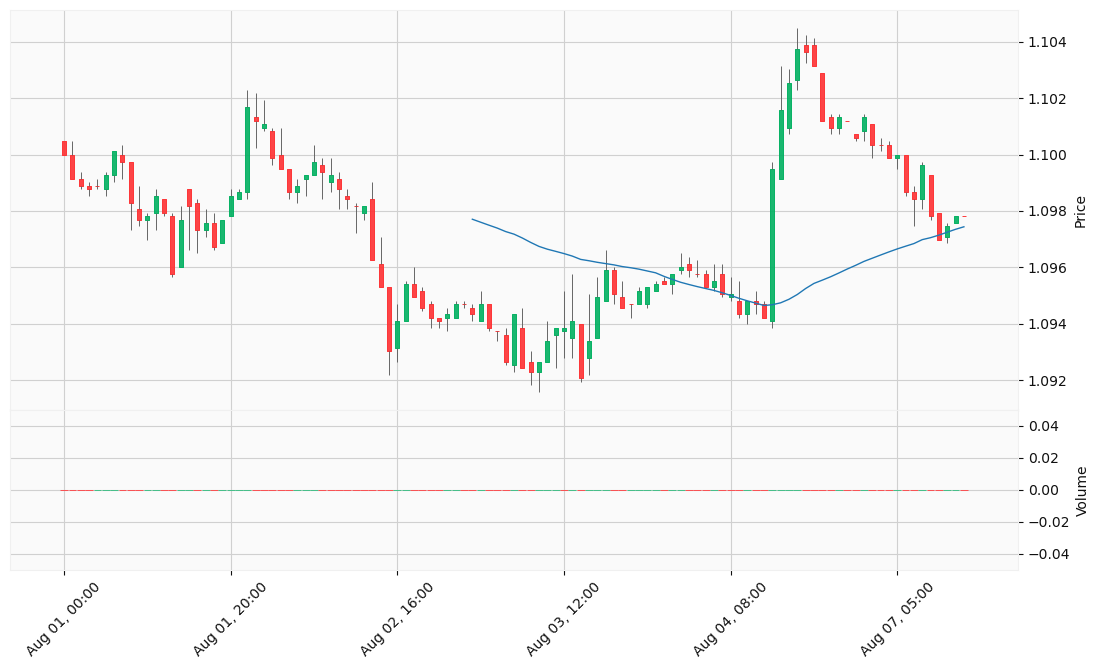

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\plotting.py:648: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


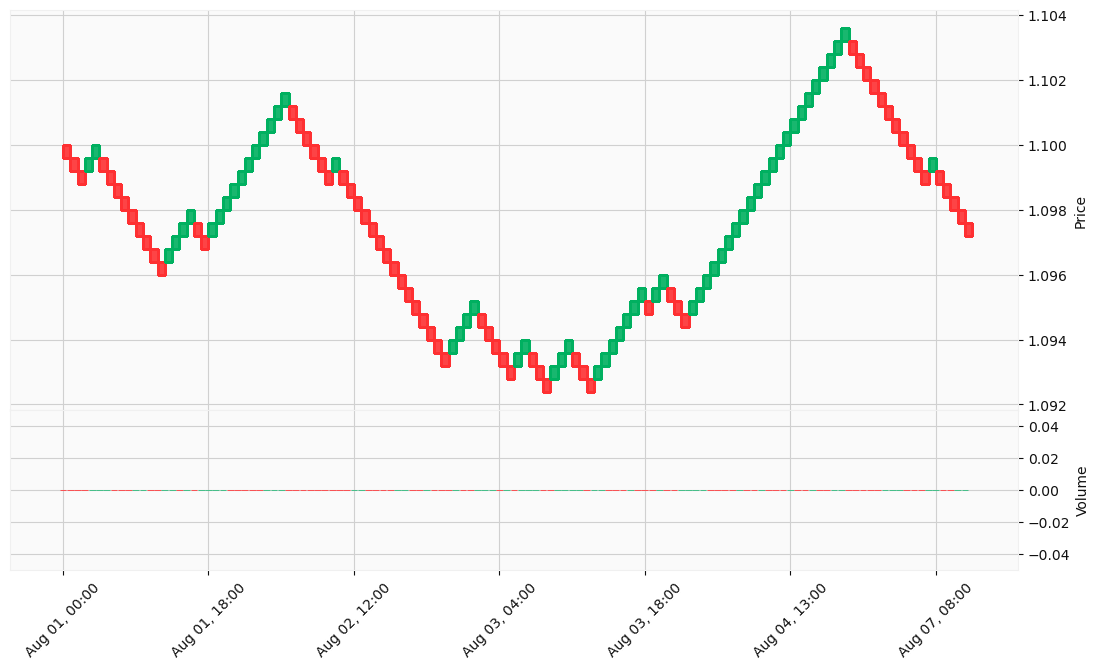

In [7]:
Ndf = df.loc['2023-08-01 00:00:00+01:00':]
mpf.plot(Ndf,type="candle", volume = True, style = 'yahoo',mav=50, figsize=(14,8))
mpf.plot(Ndf,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size =0.0004) , 
        figsize=(14,8))